In [22]:
from langgraph.graph import StateGraph, START, END, MessagesState
from typing import List

class State(MessagesState):
    user_input: str
    query_type: str
    sources: List[str]
    document: str
    answer: str
    title: str


# NODES
def classify_query_node(state: State):
    return state


def exact_query_node(state: State):
    return state


def broad_query_node(state: State):
    return state


def general_query_node(state: State):
    return state


def synthesize_document_node(state: State):
    return state


def router_node(state: State):
    print(f"QUERY TYPE: {state['query_type']}")
    match state["query_type"]:
        case "exact":
            return "exact"
        case "broad":
            return "broad"
        case "general":
            return "general"
        case _:
            return END


# GRAPH
graph_builder = StateGraph(State)

graph_builder.add_node("classify_query", classify_query_node)
graph_builder.add_node("exact", exact_query_node)
graph_builder.add_node("broad", broad_query_node)
graph_builder.add_node("synthesize_doc", synthesize_document_node)
graph_builder.add_node("general", general_query_node)

# EDGES
graph_builder.add_edge(START, "classify_query")
graph_builder.add_conditional_edges("classify_query", router_node, {
    "exact": 'exact',
    'broad': 'broad',
    'general': 'general'
})
graph_builder.add_edge("exact", "synthesize_doc")
graph_builder.add_edge("broad", "synthesize_doc")
graph_builder.add_edge("general", "synthesize_doc")
graph_builder.add_edge("synthesize_doc", END)

query_graph = graph_builder.compile()

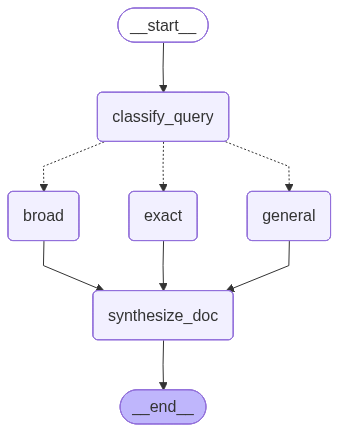

In [23]:
from IPython.display import Image, display

png = query_graph.get_graph().draw_mermaid_png()
display(Image(png))